# CSME2 Bonus Point Assignment 1

<div style="text-align: right;font-size: 0.8em">Document Version 1.0.0, released 01/12/2021</div>
For detailed task instructions, please refer to the assignment PDF.

DO NOT CLEAR THE OUTPUT of the notebook you are submitting!

### Setup
__Task A.1__ Load the data into the following numpy arrays. For the output, only use the first torque variable.
Randomly split the data from the file ```sarcos_inv.mat``` into a training set (80%) and a validation set (20%).

In [2]:
# Add any additional import you need in this cell

import sys
!{sys.executable} -m pip install scipy
import numpy as np
from scipy import io
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.cluster import kmeans_plusplus, KMeans

np.random.seed(1234)

In [3]:
# split data function

def split(X, Y, prop):
    N_x = X.shape[0]
    N_y = Y.shape[0]
    nx_split = int(np.around(prop * N_x))  # np.around(x): round the numper
    ny_split = int(np.around(prop * N_y))
    x1 = X[:nx_split]
    y1 = Y[:ny_split]
    x2 = X[nx_split:]
    y2 = Y[ny_split:]
    return x1, x2, y1, y2


In [5]:
# Load data file

file = io.loadmat('sarcos_inv.mat')
sorted(file.keys())
data = np.array(file['sarcos_inv'])
_ = np.random.shuffle(data)
data_x = data[:, :21]
data_y = data[:,22].reshape([-1,1])

testdata = io.loadmat('sarcos_inv_test.mat') 
sorted(testdata.keys())
testdata = np.array(testdata['sarcos_inv_test'])
testdata_x = testdata[:, :21]
testdata_y = testdata[:,22].reshape([-1,1])

# Input and output training data and validation data
xs_train, xs_valid, ys_train, ys_valid = split(data_x, data_y, 0.8)


# Input and output test data
xs_test = np.array(testdata_x)
ys_test = np.array(testdata_y)


In [6]:
# Check for yourself 
# The following should lead to output 
# (35587, 21)
# (35587, 1)
# (8897, 21)
# (8897, 1)
# (4449, 21)
# (4449, 1)


print(xs_train.shape)
print(ys_train.shape)
print(xs_valid.shape)
print(ys_valid.shape)
print(xs_test.shape)
print(ys_test.shape)

(35587, 21)
(35587, 1)
(8897, 21)
(8897, 1)
(4449, 21)
(4449, 1)


__Task A.2__ Standardize the data such that
1. Training inputs have mean 0
2. Each training input variable has variance 1
3. The training outputs have mean 0
4. Apply the same transformation to the validation and test data

Implement this manually, i.e., do not use a ready scaler like the one provided by scikit-learn.

In [7]:
# Store the standardized data in the following variables

xs_train_std = (xs_train - np.mean(xs_train, axis=0)) / np.std(xs_train, axis=0)
ys_train_std = ys_train - np.mean(ys_train, axis=0)

xs_valid_std = (xs_valid - np.mean(xs_valid, axis=0)) / np.std(xs_valid, axis=0)
ys_valid_std = ys_valid - np.mean(ys_valid, axis=0)

xs_test_std = (xs_test - np.mean(xs_test, axis=0)) / np.std(xs_test, axis=0)
ys_test_std = ys_test - np.mean(ys_test, axis=0)

In [8]:
# Check for yourself
# The following should lead to (roughly) six zeros and three arrays with (approximately) ones

print(round(np.mean(xs_train_std), 2))
print(round(np.mean(ys_train_std), 2))
print(round(np.mean(xs_valid_std), 2))
print(round(np.mean(ys_valid_std), 2))
print(round(np.mean(xs_test_std), 2))
print(round(np.mean(ys_test_std), 2))

print(np.var(xs_train_std, axis=0))
print(np.var(xs_valid_std, axis=0))
print(np.var(xs_test_std, axis=0))

0.0
-0.0
0.0
-0.0
-0.0
-0.0
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


__Task A.3__

In [9]:
# Task A.3.a
# Implement a function estimating the variance
def my_variance(xs):
    
    xs = xs.astype(float)
    xs -= np.mean(xs)
    result = np.sum((xs**2))/len(xs)
    
    return result

In [10]:
# Task A.3.b
# Calculate the variance of ys_train_std using your function my_variance

var_ys_train = my_variance(ys_train_std)

print('Variance of ys_train_std : ', var_ys_train)


Variance of ys_train_std :  223.50393300350225


In [11]:
# Task A.3.c
# Implement a function calculating the SMSE between two 1d numpy arrays given a normalizing factor


def my_smse(z1, z2, s):
    """Calculate the Standardized Mean Squared Error (SMSE)
    
    Arguments
    z1      1d numpy array (usually the predictions)
    z2      1d numpy array 
    s       Normalization factor 
    
    Returns
    The SMSE of the provided data
    """
    # Your implementation
    
    N = z2.shape[0]
    smse = np.sum((z1 - z2) ** 2) / (N * s)
    
    return smse

## Linear regression
### Simple linear regression
__Task A.4__

In [12]:
# This variable should contain the weights corresponding to simple linear regression (LS criterion, no bias term)
w_lr = np.linalg.inv( xs_train_std.T @ xs_train_std ) @ xs_train_std.T @ ys_train_std


# This variable should contain the predictions using w_lr on the validation data
ys_pred_valid = xs_valid_std @ w_lr

# This should contain the resulting smse
smse_lr_valid = my_smse(ys_pred_valid, ys_valid_std, var_ys_train)
print('SMSE of valid data : ', smse_lr_valid)


SMSE of valid data :  0.10317596533941288


### Linear regression with polynomial features
__Task A.5__

In [13]:
# Task A.5.a
from itertools import combinations_with_replacement
def my_poly_features(xs, degree):
    """Generates polynomial features from given data
    
    The polynomial features should include monomials (i.e., x_i, x_i**2 etc)
    and interaction terms (x_1*x_2 etc), but no repetitions.
    The order of the samples should not be changed through the transformation.
    
    Arguments
    xs      2d numpy array of shape (N,D) containing N samples of dimension D
    degree  Maximum degree of polynomials to be considered
    
    Returns
    An (N,M) numpy array containing the transformed input
    """
    # Your implementation
    idx_sets = []
    for i in range(degree+1):
        cc = combinations_with_replacement(range(xs.shape[1]), i)
        for c in cc:
            idx_sets.append(list(c))

    tmp=[]
    for idx in idx_sets:
        tmp.append(np.prod(xs[:,idx], axis=1))
    result = np.array(tmp).T
    return result
    

In [14]:
# Tasks A.5.b

# polynomial features
x_p2 = my_poly_features(xs_train_std, 2)
x_p3 = my_poly_features(xs_train_std, 3)

# This variable should contain the weights corresponding to linear regression using polynomial features up to degree 2 and 3
w_poly2 = np.linalg.lstsq(x_p2, ys_train_std, rcond=None)[0]
w_poly3 = np.linalg.lstsq(x_p3, ys_train_std, rcond=None)[0]

# polynomial features
x_valid_p2 = my_poly_features(xs_valid_std, 2)
x_valid_p3 = my_poly_features(xs_valid_std, 3)

# This variable should contain the predictions using w_poly2 and w_poly3 on the validation data
ys_pred_poly2_valid = x_valid_p2 @ w_poly2
ys_pred_poly3_valid = x_valid_p3 @ w_poly3

# This should contain the resulting smse
smse_poly2 = my_smse(ys_pred_poly2_valid, ys_valid_std, var_ys_train)
smse_poly3 = my_smse(ys_pred_poly3_valid, ys_valid_std, var_ys_train)
print('SMSE of Poly2 : ', smse_poly2)
print('SMSE of Poly3 : ', smse_poly3)

SMSE of Poly2 :  0.02729679208465681
SMSE of Poly3 :  0.012251301583185976


## Clustering
__Task B.1__ Implement the basic $K$-Means algorithm.

In [15]:
def my_kmeans(xs, init_centers, n_iter):
    """Runs the K-Means algorithm from a given initialization
    
    Arguments
    xs            2d numpy array of shape (N,D) containing N samples of dimension D
    init_centers  2d numpy array of shape (K,D) containing the initial cluster centers
    n_iter        Number of iterations of the K-Means algorithm
    
    Returns
    An (K,D) numpy array containing the final cluster centers
    """
    # Your implementation
    
    N = xs.shape[0]
    K = init_centers.shape[0]
    r_nk = np.zeros((N,K))
    mu_k = init_centers
    
    for t in range(n_iter):
        
        #reset r_nk
        r_nk.fill(0)
    
        #step1. minimize J for fixed mu_k
        for n in range(N):
            
            xn = np.repeat(xs[n].reshape(1,-1), K, axis=0)
            # np.linalg.norm: calculate the norm of matrix (matrix's value)
            dis = np.linalg.norm((xn - mu_k), axis=1)
            #assign to class k
            k = np.argmin(dis ** 2) # np.argmin() return the indices of the minimum values along an axis.
            r_nk[n][k] = 1 
        
        #step2. minimize J for fixed assigments over mu_k, set new centers
        for k in range(K):
            indexes = [i for i in range(N) if r_nk[i,k]==1]
            if len(indexes) > 0:
                mu_k[k] = xs[indexes].mean(axis=0)
    
    return mu_k

__Task B.2__ Generate test data set and plot it.

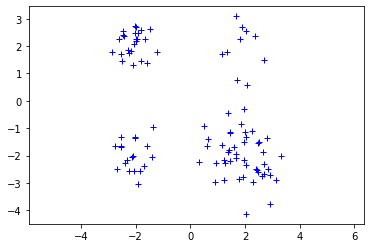

In [16]:
# Test data of shape (100,2)
means = [(-2, 2), (-2,-2), (2, -2), (2, 2)]
covs = ([(0.2, 0), (0, 0.2)], [(0.2, 0), (0, 0.2)], [(0.5, 0), (0, 0.5)], [(0.5, 0), (0, 0.5)])

n_data = 100
xs_cluster_test = np.zeros([n_data,2], dtype = float)

for n in range(n_data):
    # choose a model randomly with probrability weights
    idx = np.random.choice(4, 1, replace=True, p=[ 0.3, 0.2, 0.4, 0.1])[0]
    xs_cluster_test[n,0], xs_cluster_test[n,1] = np.random.multivariate_normal(means[idx], covs[idx], 1).T

plt.plot(xs_cluster_test[:,0], xs_cluster_test[:,1], 'b+')
plt.axis('equal')
plt.show()

__Task B.3__ Run your $K$-Means algorithm on the test data for $K=2,3,4,5$ clusters and plot the final cluster centers.

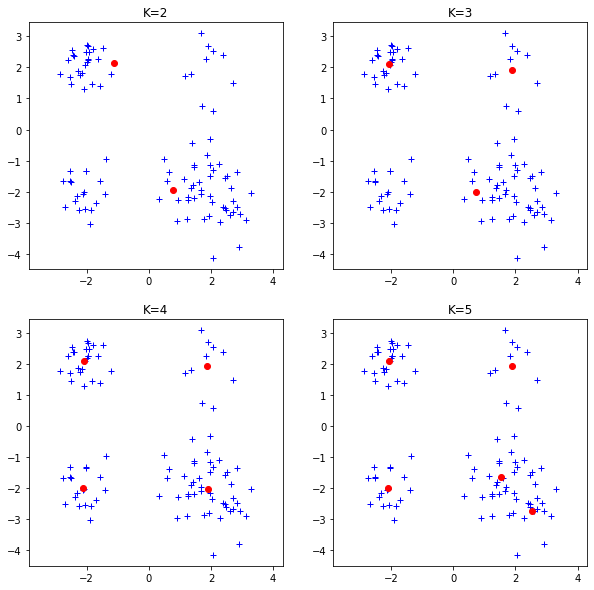

In [17]:
# Use kmeans_plusplus(xs_cluster_test, K, random_state=0) for initialization

plt.figure(figsize=(10,10))
n_iter=5

for K in range(2,6):
    centers, _ = kmeans_plusplus(xs_cluster_test, n_clusters=K, random_state=0)
    centers = my_kmeans(xs_cluster_test, centers, n_iter)
    
    plt.subplot(2,2,K-1)
    plt.plot(xs_cluster_test[:,0], xs_cluster_test[:,1], 'b+')
    plt.axis('equal')
    plt.plot(centers[:,0], centers[:,1], 'ro')
    plt.title(f'K={K}')

## Radial Basis Function Network
__Task C.1__ Find $K=100$ cluster centers using $K$-Means.

In [18]:
# This 100x21 numpy array should contain the cluster centers

K = 100
xs_centers, _ = kmeans_plusplus(xs_train_std, n_clusters=K, random_state=0)


__Task C.2__ Implement the Gaussian basis functions and transform the data accordingly

In [19]:
# Gaussian fuction

def gaussian(x, mean, std):
    
    norm = np.sqrt(2 * np.pi * (std ** 2))
    exp = np.exp(-(np.sum((x - mean) ** 2, axis=1) / (std ** 2)))
    gaussian = exp / norm
    
    return gaussian.reshape([-1,1])

In [20]:
def trans_gauss(x, centers):
    x_matrix = np.zeros([x.shape[0], 1]) #create dummy column
    std = 25
    for x_center in centers:
        x_matrix = np.hstack((x_matrix, gaussian(x, x_center, std)))
    
    return np.delete(x_matrix, 0, axis=1) #remove dummy column

In [21]:
xs_train_gauss = trans_gauss(xs_train_std, xs_centers)

__Task C.3__ Run simple linear regression on the transformed data and evaluate it on the test set

In [22]:
# This should contain the resulting predictions on the validation data set
w_gau = np.linalg.lstsq(xs_train_gauss, ys_train_std, rcond=None)[0]
ys_pred_gauss_valid = trans_gauss(xs_valid_std, xs_centers) @ w_gau

# This should contain the corresponding SMSE
smse_gauss = my_smse(ys_pred_gauss_valid, ys_valid_std, var_ys_train)
print("SMSE of valid data based on Gaussian : ", smse_gauss)

SMSE of valid data based on Gaussian :  0.041318264700180095


__Open task__ Can you improve the performance of the RBF network?

In [23]:
# By increasing the number of Gaussian Basis function
K = 200
xs_centers_new, _ = kmeans_plusplus(xs_train_std, n_clusters=K, random_state=0)
xs_train_gauss_new = trans_gauss(xs_train_std, xs_centers_new)

w_gau_new = np.linalg.lstsq(xs_train_gauss_new, ys_train_std, rcond=None)[0]
ys_pred_gauss_valid_new = trans_gauss(xs_valid_std, xs_centers_new) @ w_gau_new
smse_gau_new = my_smse(ys_pred_gauss_valid_new, ys_valid_std, var_ys_train)
print("Validation SMSE (improved): ", smse_gau_new)

Validation SMSE (improved):  0.02896101383818345


__Task C.4__ Evaluate your final model (either the one from Task C.3 or your improved model from the open task) on the test data

In [24]:
# This should contain the predictions on the test data set
# Model from Task C.3 (with 100 Basis functions)
ys_pred_gauss_test = trans_gauss(xs_test_std, xs_centers) @ w_gau
smse_test = my_smse(ys_pred_gauss_test, ys_test_std, var_ys_train)
print("SMSE of test data : ", smse_test)

# Model from the open task (with 200 Basis functions)
ys_pred_gauss_test_new = trans_gauss(xs_test_std, xs_centers_new) @ w_gau_new
smse_test_new = my_smse(ys_pred_gauss_test_new, ys_test_std, var_ys_train)
print("SMSE of test data (improved) : ", smse_test_new)

SMSE of test data :  0.04088864514279579
SMSE of test data (improved) :  0.027974351831318738
